# Data quality checks, preprocessing and EDA

This notebook documents steps preprocessing and compares the data from `GYdata.mat` file given by the authors of [1].

Tests used to check the quality are:
- Data availability: are there missing values?
- Document what is the meaning of each of the original columns (also noted in `input_data_notes.md`)
- Check if dates are consistent with the ones in the paper, and especially if variables are correctly lagged.

Preprocessing steps:
- Remove columns that are not used in the analysis
- Compute dependent variable and features required for the reproduction of [1] up to the step of generating RFF. RFF are generated in the notebook `02-mz-generate-RFF.ipynb`.

In [54]:
import pandas as pd
pd.set_option('display.max_rows', 50)
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.io import loadmat

# 1. Import data, fix dates

In [55]:
data = pd.read_excel('../data/raw/PredictorData2022.xlsx', sheet_name='Monthly')
data

/home/miroslav/miniforge3/envs/voc/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,202208,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.042089,-0.029326,0.003349,NaN,-0.040305,-0.042052
1820,202209,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.076885,-0.052554,0.004934,NaN,-0.091495,-0.092876
1821,202210,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.013937,-0.010342,0.006504,NaN,0.080248,0.079196
1822,202211,4080.11,66.387987,177.526667,0.207182,0.0415,0.0490,0.0607,0.0389,-0.017011,0.002900,-0.001010,0.026778,0.051783,0.006343,NaN,0.054166,0.052158


In [56]:
# set `yyyymm` as index and convert it to datetime
dates = pd.to_datetime(data["yyyymm"], format='%Y%m').rename('date')
data = data.set_index(dates).drop(columns='yyyymm')
# shift the index of data datafreme to the end of the month
data.index = data.index.shift(1, freq='ME')
data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
date,,,,,,,,,,,,,,,,,
1871-01-31,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-28,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-31,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-30,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-31,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.042089,-0.029326,0.003349,NaN,-0.040305,-0.042052
2022-09-30,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.076885,-0.052554,0.004934,NaN,-0.091495,-0.092876
2022-10-31,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.013937,-0.010342,0.006504,NaN,0.080248,0.079196


# 2. Compute dependent variable used in VoC

### Notes from the VoC paper and Welch and Goyal (WG) paper:

Legend: ✔️ - available from Welch and Goyal (2022) data, ❌ - not available, ❓ - not sure, ❗ - potential problems (e.g. look-ahead bias).

[VoC]: 
- Target `R`: monthly excess return of the CRSP value-weighted index (`R = CRSP_SPvw - Rfree`). [WG]: The risk-free rate from 1920 to 2005 is the Treasury-bill rate `-tbl`. After annualizing `tbl` it does not match `Rfree` but they are very close to each other. `tbl` appears smoother (see plots below). **I looked at results produced by VoC matlab code, in particular `Y` variable. I get almost perfect matching between my `R` and their `Y` if I use `Rfree` for computing `R`, NOT `tbl`!**
- 15 predictor variables from Welch and Goyal (2008) available monthly over the sample from 1926 to 2020.

[WG]: Our dependent variable is always the equity premium, that is, the total rate of return on the stock market minus the prevailing short-term interest rate. We use S&P 500 index returns from 1926 to 2005 from Center for Research in Security Press (CRSP) **month-end values**. Stock returns are the **continuously compounded** returns on the S&P 500 index, **including dividends**. Risk-free rate is the Treasury-bill rate. 
  - ✔️ `dfy` - Default Yield Spread is the difference between BAA and AAA-rated corporate bond yields. (`dfy = BAA - AAA`) 
  - ✔️ `dfr` - The Default Return Spread is the difference between long-term corporate bond and long-term government bond returns (`dfr = corpr - ltr`).
  - ✔️ `infl` - Inflation is the Consumer Price Index. ❗ Since inflation data is released only in the following month, we have to **wait for one month before using it** in our monthly regressions
  - ✔️ `svar` - Stock Variance is computed as sum of squared daily returns on the S&P 500.
  - de (Dividend Payout Ratio)
  - ✔️ `lty` - Long-term government bond yield
  - ✔️ `tbl` - Treasury Bills. Treasury-bill rates from 1934 to 2005 are the 3-Month Treasury Bill: Secondary Market Rate from the economic research data base at the Federal Reserve Bank at St. Louis (FRED)
  - ✔️ `ltr` - Long Term Rate of Returns 
  - ✔️ `tms` - The Term Spread is the difference between the long term yield on government bonds and the Treasury-bill. (`tms = lty - tbl`)
  - ✔️  `dp` - Dividend Price Ratio is the difference between the log of dividends and the log of prices. Dividends are 12-month moving sums of dividends paid on the S&P 500 index. (`D12` column). 
  - ✔️ `dy` - The Dividend Yield (d/y) is the difference between the log of dividends and the log of lagged prices. 
  - ✔️ `ep` - Earnings Price Ratio (e/p) is the difference between the log of earnings and the log of prices. Earnings are 12-month moving sums of earnings on the S&P 500 index. (`E12` column).
  - ✔️ `de` Dividend Payout Ratio (d/e) is the difference between the log of dividends and the log of earnings.
  - ✔️ `b/m` - Book-to-Market Ratio is the ratio of book value to market value for the Dow Jones Industrial Average.
  - ✔️ `ntis` - Net Equity Expansion is the ratio of 12-month moving sums of net issues by NYSE listed stocks divided by the total end-of-year market capitalization of NYSE stocks.
  - ✔️ `mr` one lag of the market return - once lagged `CRSP_SPvw`, or `CRSP_SPvwx` if we want to exclude dividends. This variable is not lagged separately but together with other independent variables.

Lagging will be performed on independent variables. To every given date, we will have a true value of excess return `R` and all the independent variables from the previous month (indcluding market returns `mr`). 

Data originally from Welch and Goyal (2008) and updated by Goyal (2022):

[A Comprehensive Look at the Empirical Performance of Equity Premium Prediction (with Ivo Welch), July 2008, Review of Financial Studies 21(4) 1455‒1508.](https://drive.google.com/file/d/1uvjBJ9D09T0_sp7kQppWpD-xelJ0KQhc/view)\
    [Original data (up to 2005) used in 2008 paper](https://drive.google.com/file/d/1T0pCslc2vxMDt7EFGI0MJ6mndeQvObBT/view?usp=sharing) \
    [Updated data (up to 2022)](https://docs.google.com/spreadsheets/d/1g4LOaRj4TvwJr9RIaA_nwrXXWTOy46bP/edit?usp=share_link&ouid=113571510202500088860&rtpof=true&sd=true)

All the links are provided on the [Goyal's website](https://sites.google.com/view/agoyal145).

In [57]:
data["dfy"] = data["BAA"] - data["AAA"]
data["dfr"] = data["corpr"] - data["ltr"]
data["tms"] = data["lty"] - data["tbl"]
data["dp"] = np.log(data["D12"])  - np.log(data["Index"])
data["dy"] = np.log(data["D12"])  - np.log(data["Index"].shift(1))
data["ep"] = np.log(data["E12"]) - np.log(data["Index"])
data["de"] = np.log(data["D12"]) - np.log(data["E12"])
# tbl is yield on 3-month treasury bill, expressed in annual terms. This way we convert it to monthly compounding rate
data["tbill_rfree"] = (1+data.tbl)**(1/12) - 1 
data["mr"] = data["CRSP_SPvw"]
data["R"] = data["CRSP_SPvw"] -  data["Rfree"] # excess return 
data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,dfy,dfr,tms,dp,dy,ep,de,tbill_rfree,mr,R
date,,,,,,,,,,,,,,,,,,,,,
1871-01-31,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-2.837728,NaN,-2.406945,-0.430783,NaN,NaN,NaN
1871-02-28,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,...,NaN,NaN,NaN,-2.851151,-2.837728,-2.420368,-0.430783,NaN,NaN,NaN
1871-03-31,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,...,NaN,NaN,NaN,-2.875302,-2.851151,-2.444519,-0.430783,NaN,NaN,NaN
1871-04-30,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,...,NaN,NaN,NaN,-2.903111,-2.875302,-2.472328,-0.430783,NaN,NaN,NaN
1871-05-31,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,...,NaN,NaN,NaN,-2.928112,-2.903111,-2.497329,-0.430783,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,...,0.0108,0.012764,0.0027,-4.110113,-4.153480,-3.042012,-1.068101,0.002166,-0.040305,-0.042205
2022-09-30,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,...,0.0110,0.024331,0.0039,-4.005414,-4.103464,-2.953150,-1.052264,0.002572,-0.091495,-0.093395
2022-10-31,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,...,0.0116,0.003595,0.0026,-4.074094,-3.997259,-3.055849,-1.018245,0.003048,0.080248,0.077948


In [58]:
# VoC Y starts at 1927-01-31, ends at 2020-12-31

<Axes: xlabel='date'>

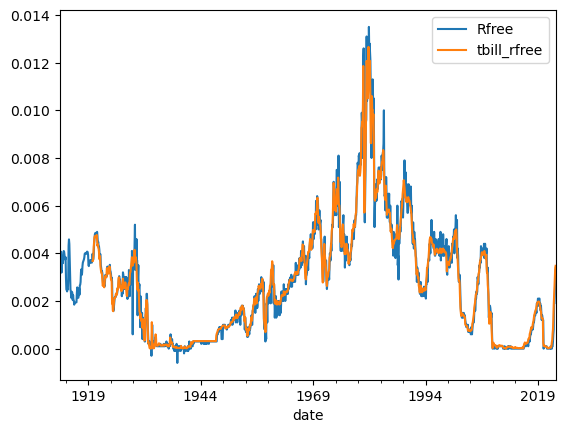

In [59]:
data.iloc[500:].loc[:, ["Rfree", "tbill_rfree"]].plot()

In the VoC paper, the authors use data in the following timeframe: 1926-2020.
Variables used: dfy, infl, svar, de, lty, tms, tbl, dfr, dp, dy, ltr, ep, b/m, and ntis, as well as one lag of the market return (just CRSP_SPvw or CRSP_SPvwx).

In [60]:
data = data.loc[:, ['dfy', 'infl', 'svar', 'de', 'lty', 'tms', 'tbl', 'dfr', 'dp', 'dy', 'ltr', 'ep', 'b/m', 'ntis', 'mr', 'R']].copy()
data;

## Lag independent variables
We shift independent variable by one month into the past and we keep the dependent variable at the same position. In addition, we shift inflation once more into the past.

In [61]:
data.index = data.index.shift(1, freq='ME') # shift everything by +1 month
data["R"] = data["R"].shift(-1) # shift the target variable by -1 month (0 months in total)
data["infl"] = data["infl"].shift(1) # shift the inflation by 1 month (+2 months in total)
data.dropna(inplace=True)

In [62]:
data

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
date,,,,,,,,,,,,,,,,
1927-01-31,0.0100,0.005682,0.000465,-0.586175,0.0354,0.0047,0.0307,-0.002200,-2.973012,-2.956570,0.007800,-2.386837,0.441476,0.050876,0.026047,-0.005410
1927-02-28,0.0095,0.000000,0.000470,-0.567601,0.0351,0.0028,0.0323,-0.001900,-2.942374,-2.963349,0.007500,-2.374773,0.443706,0.050824,-0.002910,0.042922
1927-03-31,0.0092,-0.011299,0.000287,-0.549182,0.0347,0.0018,0.0329,-0.001900,-2.979535,-2.932946,0.008800,-2.430353,0.428501,0.051668,0.045522,0.004324
1927-04-30,0.0092,-0.005714,0.000924,-0.531456,0.0331,0.0011,0.0320,-0.017000,-2.976535,-2.970053,0.025300,-2.445079,0.469765,0.046357,0.007324,0.010521
1927-05-31,0.0090,-0.005747,0.000603,-0.512916,0.0333,-0.0006,0.0339,0.006000,-2.984225,-2.967143,-0.000500,-2.471309,0.456754,0.050514,0.013021,0.059353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.0115,0.013736,0.003188,-1.083899,0.0290,0.0067,0.0223,0.005408,-4.160174,-4.072973,0.026966,-3.076276,0.218187,-0.006121,0.093766,-0.042205
2022-09-30,0.0108,-0.000118,0.003349,-1.068101,0.0290,0.0027,0.0263,0.012764,-4.110113,-4.153480,-0.042089,-3.042012,0.227429,-0.009732,-0.040305,-0.093395
2022-10-31,0.0110,-0.000354,0.004934,-1.052264,0.0352,0.0039,0.0313,0.024331,-4.005414,-4.103464,-0.076885,-2.953150,0.249478,-0.011292,-0.091495,0.077948


## **Comparison with data used in VoC**
Authors provided the data in the `GYdata.mat` file. I will compare the data from the `GYdata.mat` file with the data we computed from the Welch and Goyal's data.

In [63]:
voc_data=loadmat('../data/external/GYdata.mat')
voc_Y = voc_data['Y']
voc_X = pd.DataFrame(voc_data['X'])
voc_X.columns = ['dfy', 'infl', 'svar', 'de', 'lty', 'tms', 'tbl', 'dfr', 'dp', 'dy', 'ltr', 'ep', 'b/m', 'ntis']
voc_X.index = pd.to_datetime(voc_data['dates'].flatten(), format='%Y%m').rename('date')
voc_X.index = voc_X.index.shift(1, freq='ME') 
# add y variable to the dataframe
voc_X['R'] = voc_Y

In [64]:
voc_X

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,R
date,,,,,,,,,,,,,,,
1927-01-31,0.0100,0.000000,0.000465,-0.586175,0.0354,0.0047,0.0307,-0.0022,-2.973012,-2.956570,0.0078,-2.386837,0.441476,0.050876,-0.005410
1927-02-28,0.0095,-0.011299,0.000470,-0.567601,0.0351,0.0028,0.0323,-0.0019,-2.942374,-2.963349,0.0075,-2.374773,0.443706,0.050824,0.042922
1927-03-31,0.0092,-0.005714,0.000287,-0.549182,0.0347,0.0018,0.0329,-0.0019,-2.979535,-2.932946,0.0088,-2.430353,0.428501,0.051668,0.004324
1927-04-30,0.0092,-0.005747,0.000924,-0.531456,0.0331,0.0011,0.0320,-0.0170,-2.976535,-2.970053,0.0253,-2.445079,0.469765,0.046357,0.010521
1927-05-31,0.0090,0.000000,0.000603,-0.512916,0.0333,-0.0006,0.0339,0.0060,-2.984225,-2.967143,-0.0005,-2.471309,0.456754,0.050514,0.059353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.0117,0.005058,0.001608,-0.509646,0.0062,0.0049,0.0013,0.0323,-4.008492,-3.954855,0.0287,-3.498846,0.253848,-0.011998,0.071968
2020-09-30,0.0102,0.003153,0.000743,-0.510916,0.0065,0.0055,0.0010,-0.0139,-4.080892,-4.013173,-0.0349,-3.569975,0.235975,-0.008504,-0.038251
2020-10-31,0.0105,0.001393,0.004907,-0.512197,0.0068,0.0057,0.0011,-0.0039,-4.045576,-4.085594,0.0080,-3.533379,0.241482,-0.005698,-0.026509


In [65]:
data_voc_subset=data.loc[data.index < dt.datetime(2021, 1, 1)]

In [66]:
diffs = data_voc_subset - voc_X


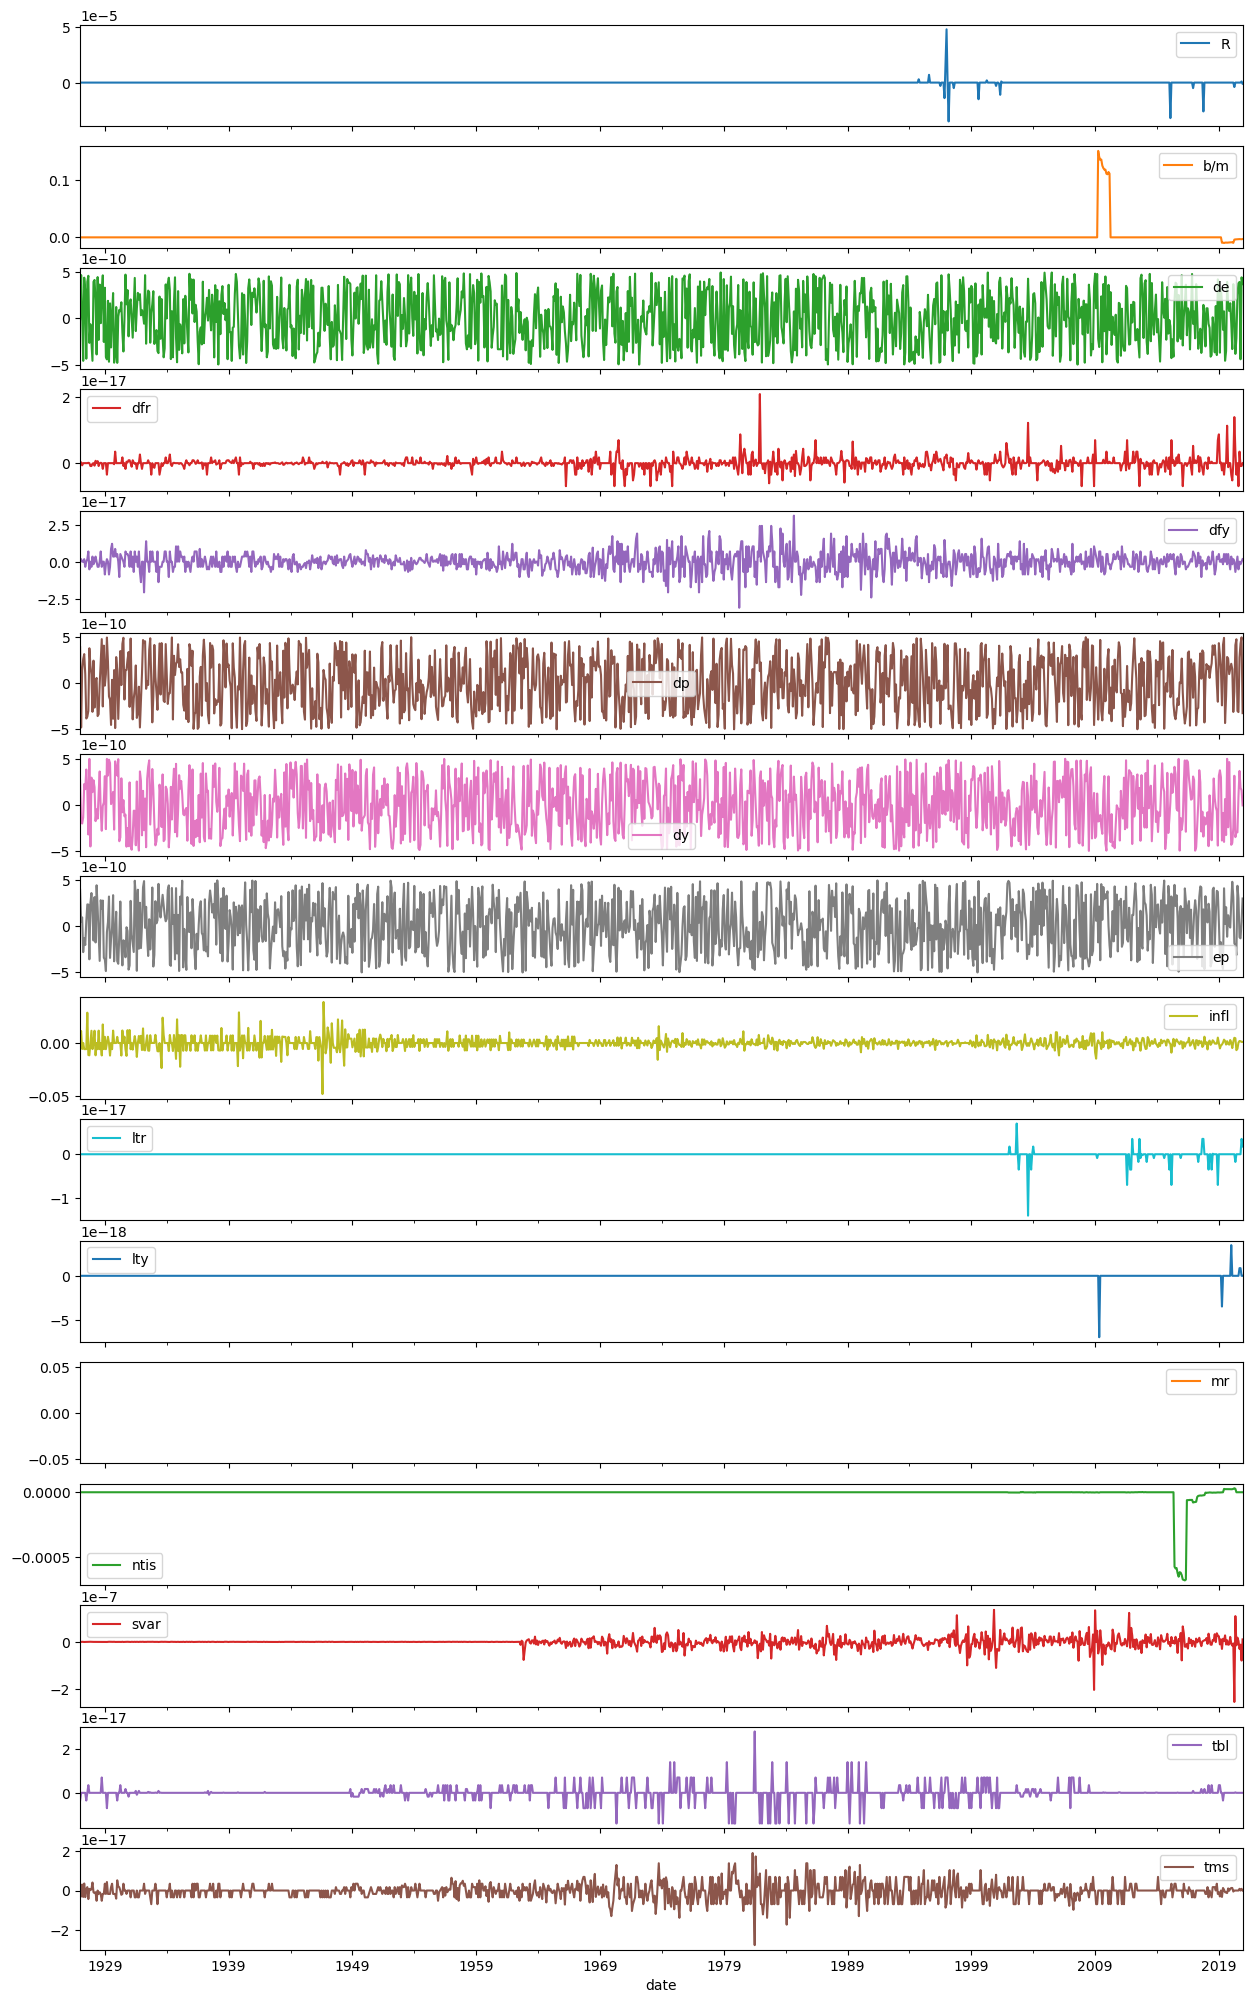

In [67]:
diffs.plot(subplots=True, figsize=(15, 25));

In [68]:
print(diffs.abs().max())

R       4.800000e-05
b/m     1.496126e-01
de      4.997015e-10
dfr     2.081668e-17
dfy     3.122502e-17
dp      4.998970e-10
dy      4.999077e-10
ep      4.999818e-10
infl    4.801272e-02
ltr     1.387779e-17
lty     6.938894e-18
mr               NaN
ntis    6.788467e-04
svar    2.558411e-07
tbl     2.775558e-17
tms     2.775558e-17
dtype: float64


`mr` does not have a counterpart variable in `voc_data` no difference is calculated for it. All independent variables, except for `b/m` and `infl`, have a good match with our data. The same is true for the returns, i.e. dependent variable. Variable `b/m` is provided directly by Goyal's methodology and it is not altered here. Thus, I can not asses where the difference comes from. Note that the authors of VoC used slightly older dataset, so it could be that Goyal and Welch updated the methodology for calculating `b/m` in the meantime. Difference in `infl` is due to the fact that we lagged it by one month to prevent look-ahead bias, and the authors of VoC probably did not do that (although they mention that results are robust to this step).

## Checks NAs

In [69]:
data.isna().sum().sum() #ok

0

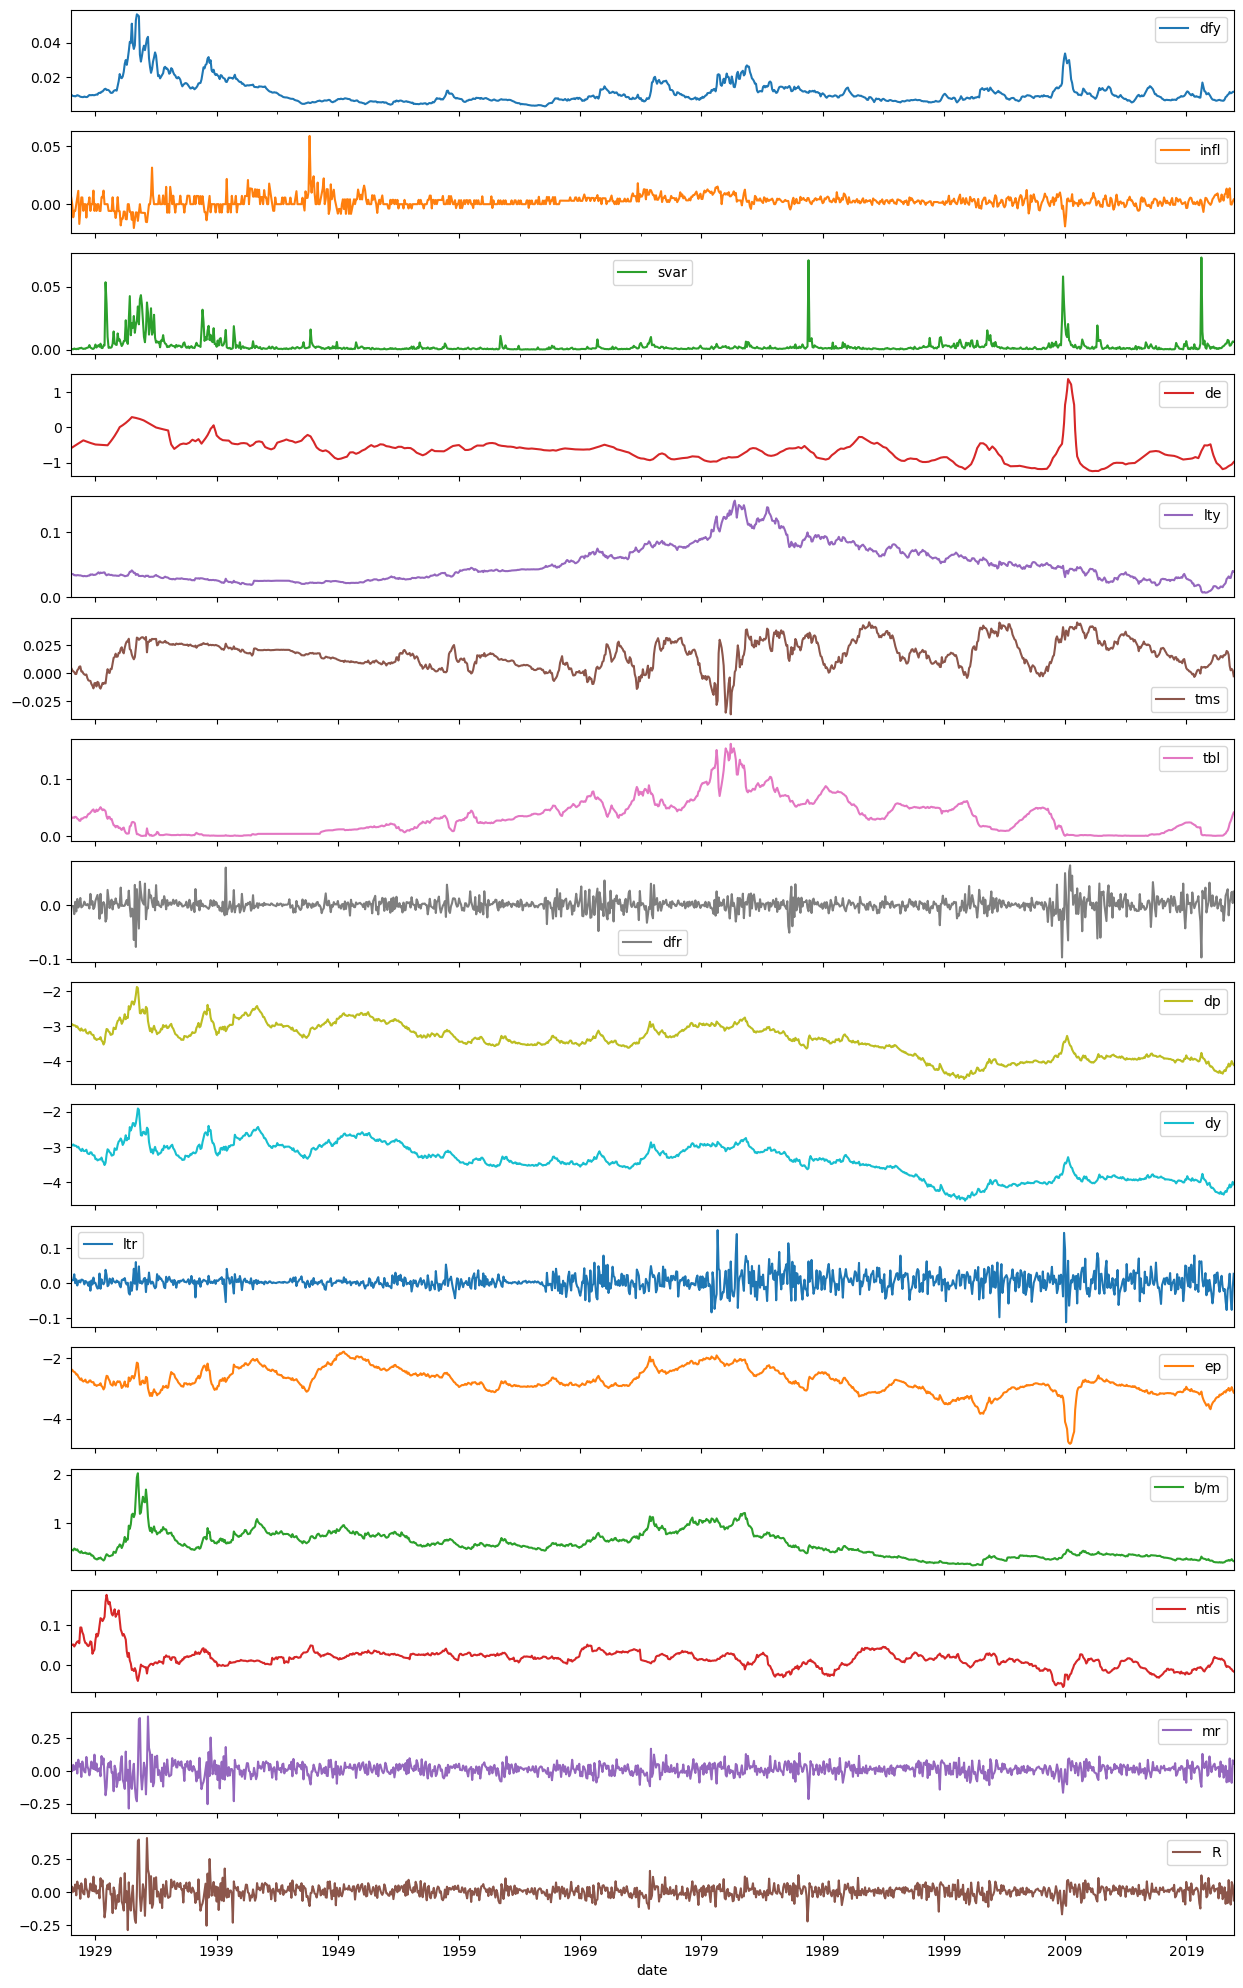

In [70]:
data.plot(subplots=True, figsize=(15, 25));

In [71]:
# write data to csv file as interim data
data.to_csv('../data/interim/interim_nonstd_data.csv')

# 3. Standardization by volatility:

## Notes from VoC
We volatility-standardize returns and predictors using backward-looking standard deviations that preserve the out-of-sample nature of our forecasts. 

Returns are standardized by their trailing 12-month return standard deviation (to capture their comparatively fast-moving conditional volatility). For returns, we calculate standard deviation from the uncentered second moment due to the noisiness of estimating mean monthly returns in short windows. 

$$ \sigma_{t}^{uncent.} = \sqrt{E[R_{t}^2]}$$

In contrast, predictors are standardized using an expanding window historical standard deviation (given the much higher persistence of most predictors). We require 36 months of data to ensure enough stability in our initial predictor standardization, so the final sample we bring to our analysis began in 1930. 

We perform this standardization to align the empirical analysis with our homoskedastic theoretical setting. Our results are insensitive to this step - none of our findings are sensitive to variations in how standardizations are implemented.

In [72]:
# calculate 12 months trailing standard deviation (via non-centered second moment) of returns
sigma_R = (data.R**2).rolling(12).mean().apply(np.sqrt) # checked manually, ok
data['R'] = data['R']/sigma_R
data.iloc[:,:].head(20);

In [73]:
# calculate expending window standard deviation 
sigma_predictors = data.iloc[:,:-1].expanding(min_periods=36).std() # ok, checked manually
sigma_predictors.head(50);

In [74]:
data.iloc[:,:-1]= data.iloc[:,:-1]/sigma_predictors
data.head(50);

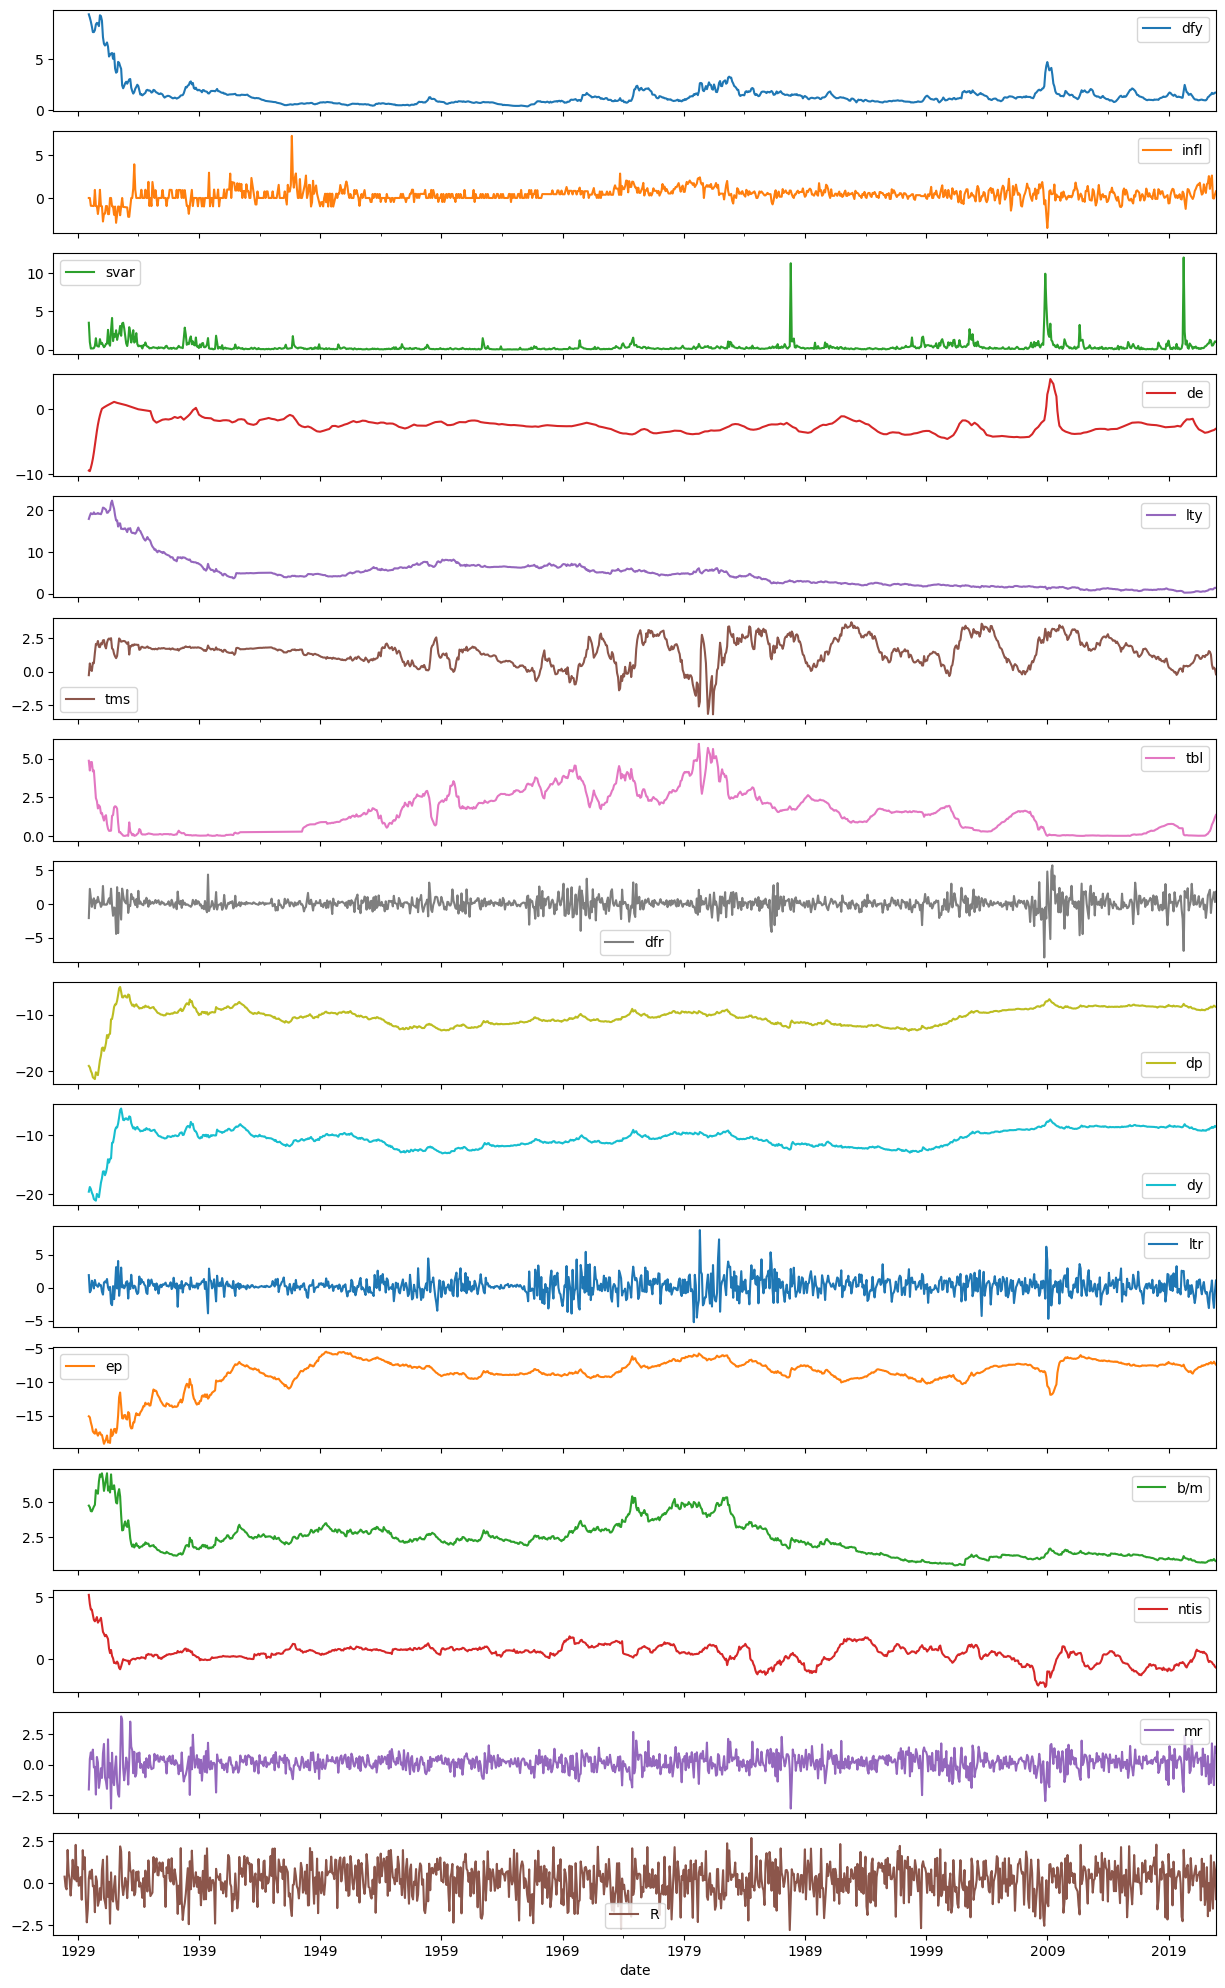

In [75]:
data.plot(subplots=True, figsize=(15, 25));

In [76]:
data.head(50) 

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
date,,,,,,,,,,,,,,,,
1927-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data = data.loc[data.index > dt.datetime(1929, 12, 12)]
data

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
date,,,,,,,,,,,,,,,,
1929-12-31,9.463101,0.000000,3.522218,-9.480124,17.946744,-0.267664,4.854900,-2.117184,-19.041125,-19.583009,1.892854,-15.096032,4.766296,5.174505,-2.037304,0.288126
1930-01-31,9.137888,0.000000,0.996113,-9.573097,18.694918,0.613196,4.226658,2.206750,-19.297847,-18.788349,-0.713609,-15.245790,4.647688,4.444831,0.457240,0.694734
1930-02-28,8.744785,-0.902839,0.141551,-9.047697,19.317084,0.133301,4.772245,0.913696,-19.925824,-19.125106,-0.459937,-16.004079,4.371450,3.996735,0.989528,0.274144
1930-03-31,8.262224,-0.912300,0.172508,-8.422173,19.120484,0.050347,4.769870,-0.453574,-20.320173,-19.749430,1.046632,-16.559002,4.351337,3.982363,0.437831,0.797222
1930-04-30,7.704174,-0.922001,0.152278,-7.642985,19.110364,0.665901,4.168087,0.442426,-21.040377,-20.137156,0.680915,-17.334023,4.527337,3.567818,1.219600,-0.185709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.692906,2.604536,0.530717,-3.309497,1.031373,0.518760,0.726373,0.384379,-8.744586,-8.600267,1.086164,-7.308629,0.813942,-0.238172,1.728362,-0.740901
2022-09-30,1.590550,-0.022404,0.557793,-3.260327,1.031579,0.209036,0.857020,0.907315,-8.634899,-8.764461,-1.693465,-7.228964,0.848243,-0.378696,-0.742982,-1.516081
2022-10-31,1.620710,-0.067242,0.822067,-3.211241,1.252524,0.301941,1.020395,1.728163,-8.412818,-8.654442,-3.080439,-7.020210,0.930366,-0.439382,-1.684814,1.250263


In [78]:
# save to csv 
data.to_csv('../data/processed/processed_data.csv')